In [45]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews=[]

In [46]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip

In [47]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [48]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [49]:
iphone_snapdeal

['Worth in this price. Excellent features. Overall performance is Good',
 'Good , product is satisfied which I got from Snapdeal',
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.',
 'offer product is available, customer care also good',
 'lovely  fastest super',
 'Very good product and delivered in time  as committed; true value for money',
 'This a great experience to have a iphone, Snapdeal delivery was above expectation !!',
 'Good price, Great phone, very happy to own one. Recommending to everyone',
 'Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plast

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Worth in this price. Excellent features. Overall performance is Good','Good,product is satisfied which I got from Snapdeal','Great product at such amazing price. Delivery was fast. N iPhone is amazing.','Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.','offer product is available,customer care also good','lovely fastest super','Very good product and delivered in time as committed; true value for money','This a great experience to have a iphone,...,'Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping','Its an awesome phone','got delivered on time and satisfactory product as always',"""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",'The 5C was delivered in a sealed box - crisp and brand new ! super deal.','The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.','I am really happy with product','Awesome iphone in this price range.\ni would recommend this phone','Superb model,snapdeal delivered as promised time']


#text Preprocessing

In [52]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Worth in this price. Excellent features. Overall performance is Good\'  \'Good   product is satisfied which I got from Snapdeal\'  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.\'  \'offer product is available  customer care also good\'  \'lovely  fastest super\'  \'Very good product and delivered in time  as committed; true value for money\'  \'This a great experience to have a iphone  Snapdeal delivery was above expectation !!\'  \'Good price  Great phone  very happy to own one. Recommending to everyone\'  \'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\\nPros\\n1. Very Cheap prize\\n2. IOS 9 upgrade.\\n3. Very smooth\\n4. Good build quality\\n\\nCons\\n1.Plastic body\\n2. 8GB memo

In [53]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Worth in this price Excellent features Overall performance is Good  Good   product is satisfied which I got from Snapdeal  Great product at such amazing price Delivery was fast N iPhone is amazing  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  offer product is available  customer care also good  lovely  fastest super  Very good product and delivered in time  as committed true value for money  This a great experience to have a iphone  Snapdeal delivery was above expectation   Good price  Great phone  very happy to own one Recommending to everyone  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
# remove https or url within text
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Worth in this price Excellent features Overall performance is Good  Good   product is satisfied which I got from Snapdeal  Great product at such amazing price Delivery was fast N iPhone is amazing  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  offer product is available  customer care also good  lovely  fastest super  Very good product and delivered in time  as committed true value for money  This a great experience to have a iphone  Snapdeal delivery was above expectation   Good price  Great phone  very happy to own one Recommending to everyone  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used

In [56]:
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Worth', 'in', 'this', 'price', 'Excellent', 'features', 'Overall', 'performance', 'is', 'Good', 'Good', 'product', 'is', 'satisfied', 'which', 'I', 'got', 'from', 'Snapdeal', 'Great', 'product', 'at', 'such', 'amazing', 'price', 'Delivery', 'was', 'fast', 'N', 'iPhone', 'is', 'amazing', 'Good', 'budgeted', 'iphone', 'Should', 'only', 'go', 'for', 'it', 'if', 'want', 'to', 'have', 'an', 'iphone', 'experience', 'but', 'within', 'your', 'budget', 'offer', 'product', 'is', 'available', 'customer', 'care', 'also', 'good', 'lovely', 'fastest', 'super', 'Very', 'good', 'product', 'and', 'delivered', 'in', 'time', 'as', 'committed', 'true', 'value', 'for', 'money', 'This', 'a', 'great', 'experience', 'to', 'have', 'a', 'iphone', 'Snapdeal', 'delivery', 'was', 'above', 'expectation', 'Good', 'price', 'Great', 'phone', 'very', 'happy', 'to', 'own', 'one', 'Recommending', 'to', 'everyone', 'Recently', 'purchase', 'the', 'phone', 'and', 'was', 'a', 'bit', 'doubtfull', 'while', 'purchasing', 'but

In [57]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
# Tokens count
len(text_tokens)

1573

In [59]:
# Remove Stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Worth', 'price', 'Excellent', 'features', 'Overall', 'performance', 'Good', 'Good', 'product', 'satisfied', 'got', 'Snapdeal', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'Good', 'budgeted', 'iphone', 'Should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'lovely', 'fastest', 'super', 'Very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'This', 'great', 'experience', 'iphone', 'Snapdeal', 'delivery', 'expectation', 'Good', 'price', 'Great', 'phone', 'happy', 'one', 'Recommending', 'everyone', 'Recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'It', 'packed', 'beatifully', 'seller', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'pl

In [60]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'everyone', 'go', 'phone', 'budget', '20k', 'excellent', 'product', 'good', 'service', 'snap', 'deal', 'dream', 'come', 'true', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'nice', 'deal', 'snapdeal', 'good', 'shipping', 'service', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'really', 'happy', 'product', 'servicealways', 'best', 'worth', 'buying', 'snap', 'deal', 'due', 'competitive', 'price', 'good', 'servicenthanks', 'sd', 'phone', 'price', 'pros', 'picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'you', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'stars', 'this']


In [61]:
# Stemming (Optional)
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['look', 'attract', 'premium', 'good', 'plastuc', 'use', 'everyon', 'go', 'phone', 'budget', '20k', 'excel', 'product', 'good', 'servic', 'snap', 'deal', 'dream', 'come', 'true', 'good', 'phone', 'mobil', 'opar', 'essi', 'inter', 'net', 'fast', 'work', 'nice', 'deal', 'snapdeal', 'good', 'ship', 'servic', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'realli', 'happi', 'product', 'servicealway', 'best', 'worth', 'buy', 'snap', 'deal', 'due', 'competit', 'price', 'good', 'servicenthank', 'sd', 'phone', 'price', 'pro', 'pictur', 'qualiti', 'awesom', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphon', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnoth', 'good', 'new', 'iphon', 'till', 'itnniphon', '5c', 'snapdeal', 'time', 'deliveri', '4', 'star', 'thi']


In [62]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

worth price excellent features overall performance good good product satisfied got snapdeal great product amazing price delivery fast n iphone amazing good budgeted iphone should go want iphone experience within budget offer product available customer care also good lovely fastest super very good product delivered time committed true value money this great experience iphone snapdeal delivery expectation good price great phone happy one recommending everyone recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller day dispatchnprosn1 very cheap prizen2 ios 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8gb memorynnbut even plastic body looks attractive premium good plastuc used everyone go phone budget 20k excellent product good service snap deal dream come true good phone mobile oparating essy inter net fast working nice deal snapdeal good shipping service good price great seller genuine product fast shipping recom

In [63]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['worth', 'price', 'excellent', 'feature', 'overall', 'performance', 'good', 'good', 'product', 'satisfied', 'get', 'snapdeal', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'good', 'budget', 'iphone', 'should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'lovely', 'fast', 'super', 'very', 'good', 'product', 'deliver', 'time', 'commit', 'true', 'value', 'money', 'this', 'great', 'experience', 'iphone', 'snapdeal', 'delivery', 'expectation', 'good', 'price', 'great', 'phone', 'happy', 'one', 'recommend', 'everyone', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'good', 'iphone', 'get', 'price', 'it', 'pack', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8', 'gb', 'memorynnbut', 'even', 'plastic', 'body

In [64]:
clean_comments=' '.join(lemmas)
clean_comments

'worth price excellent feature overall performance good good product satisfied get snapdeal great product amazing price delivery fast n iphone amazing good budget iphone should go want iphone experience within budget offer product available customer care also good lovely fast super very good product deliver time commit true value money this great experience iphone snapdeal delivery expectation good price great phone happy one recommend everyone recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2 io 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8 gb memorynnbut even plastic body look attractive premium good plastuc use everyone go phone budget 20k excellent product good service snap deal dream come true good phone mobile oparating essy inter net fast work nice deal snapdeal good shipping service good price great seller genuine product fast shipping recommend really happy pr

In [65]:
# feature extraction
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [66]:
print(cv.vocabulary_)

{'worth': 404, 'price': 254, 'excellent': 118, 'feature': 124, 'overall': 234, 'performance': 242, 'good': 142, 'product': 262, 'satisfied': 299, 'get': 139, 'snapdeal': 331, 'great': 147, 'amazing': 23, 'delivery': 96, 'fast': 123, 'iphone': 172, 'budget': 50, 'should': 319, 'go': 141, 'want': 390, 'experience': 120, 'within': 398, 'offer': 225, 'available': 32, 'customer': 85, 'care': 58, 'also': 21, 'lovely': 193, 'super': 344, 'very': 389, 'deliver': 95, 'time': 366, 'commit': 69, 'true': 375, 'value': 387, 'money': 207, 'this': 360, 'expectation': 119, 'phone': 243, 'happy': 151, 'one': 226, 'recommend': 289, 'everyone': 116, 'recently': 286, 'purchase': 272, 'bit': 43, 'doubtfull': 105, 'purchasing': 273, 'must': 211, 'tell': 351, 'it': 176, 'pack': 235, 'beatifully': 40, 'seller': 308, 'day': 89, 'dispatchnprosn1': 101, 'cheap': 62, 'prizen2': 258, 'io': 169, 'upgraden3': 382, 'smoothn4': 329, 'build': 51, 'qualitynnconsn1plastic': 276, 'bodyn2': 46, 'gb': 137, 'memorynnbut': 20

In [68]:
print(clean_commentscv.toarray().shape)

(1028, 409)


N gram

In [69]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [70]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [71]:
# tfidf vectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

Generate wordcloud

In [72]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

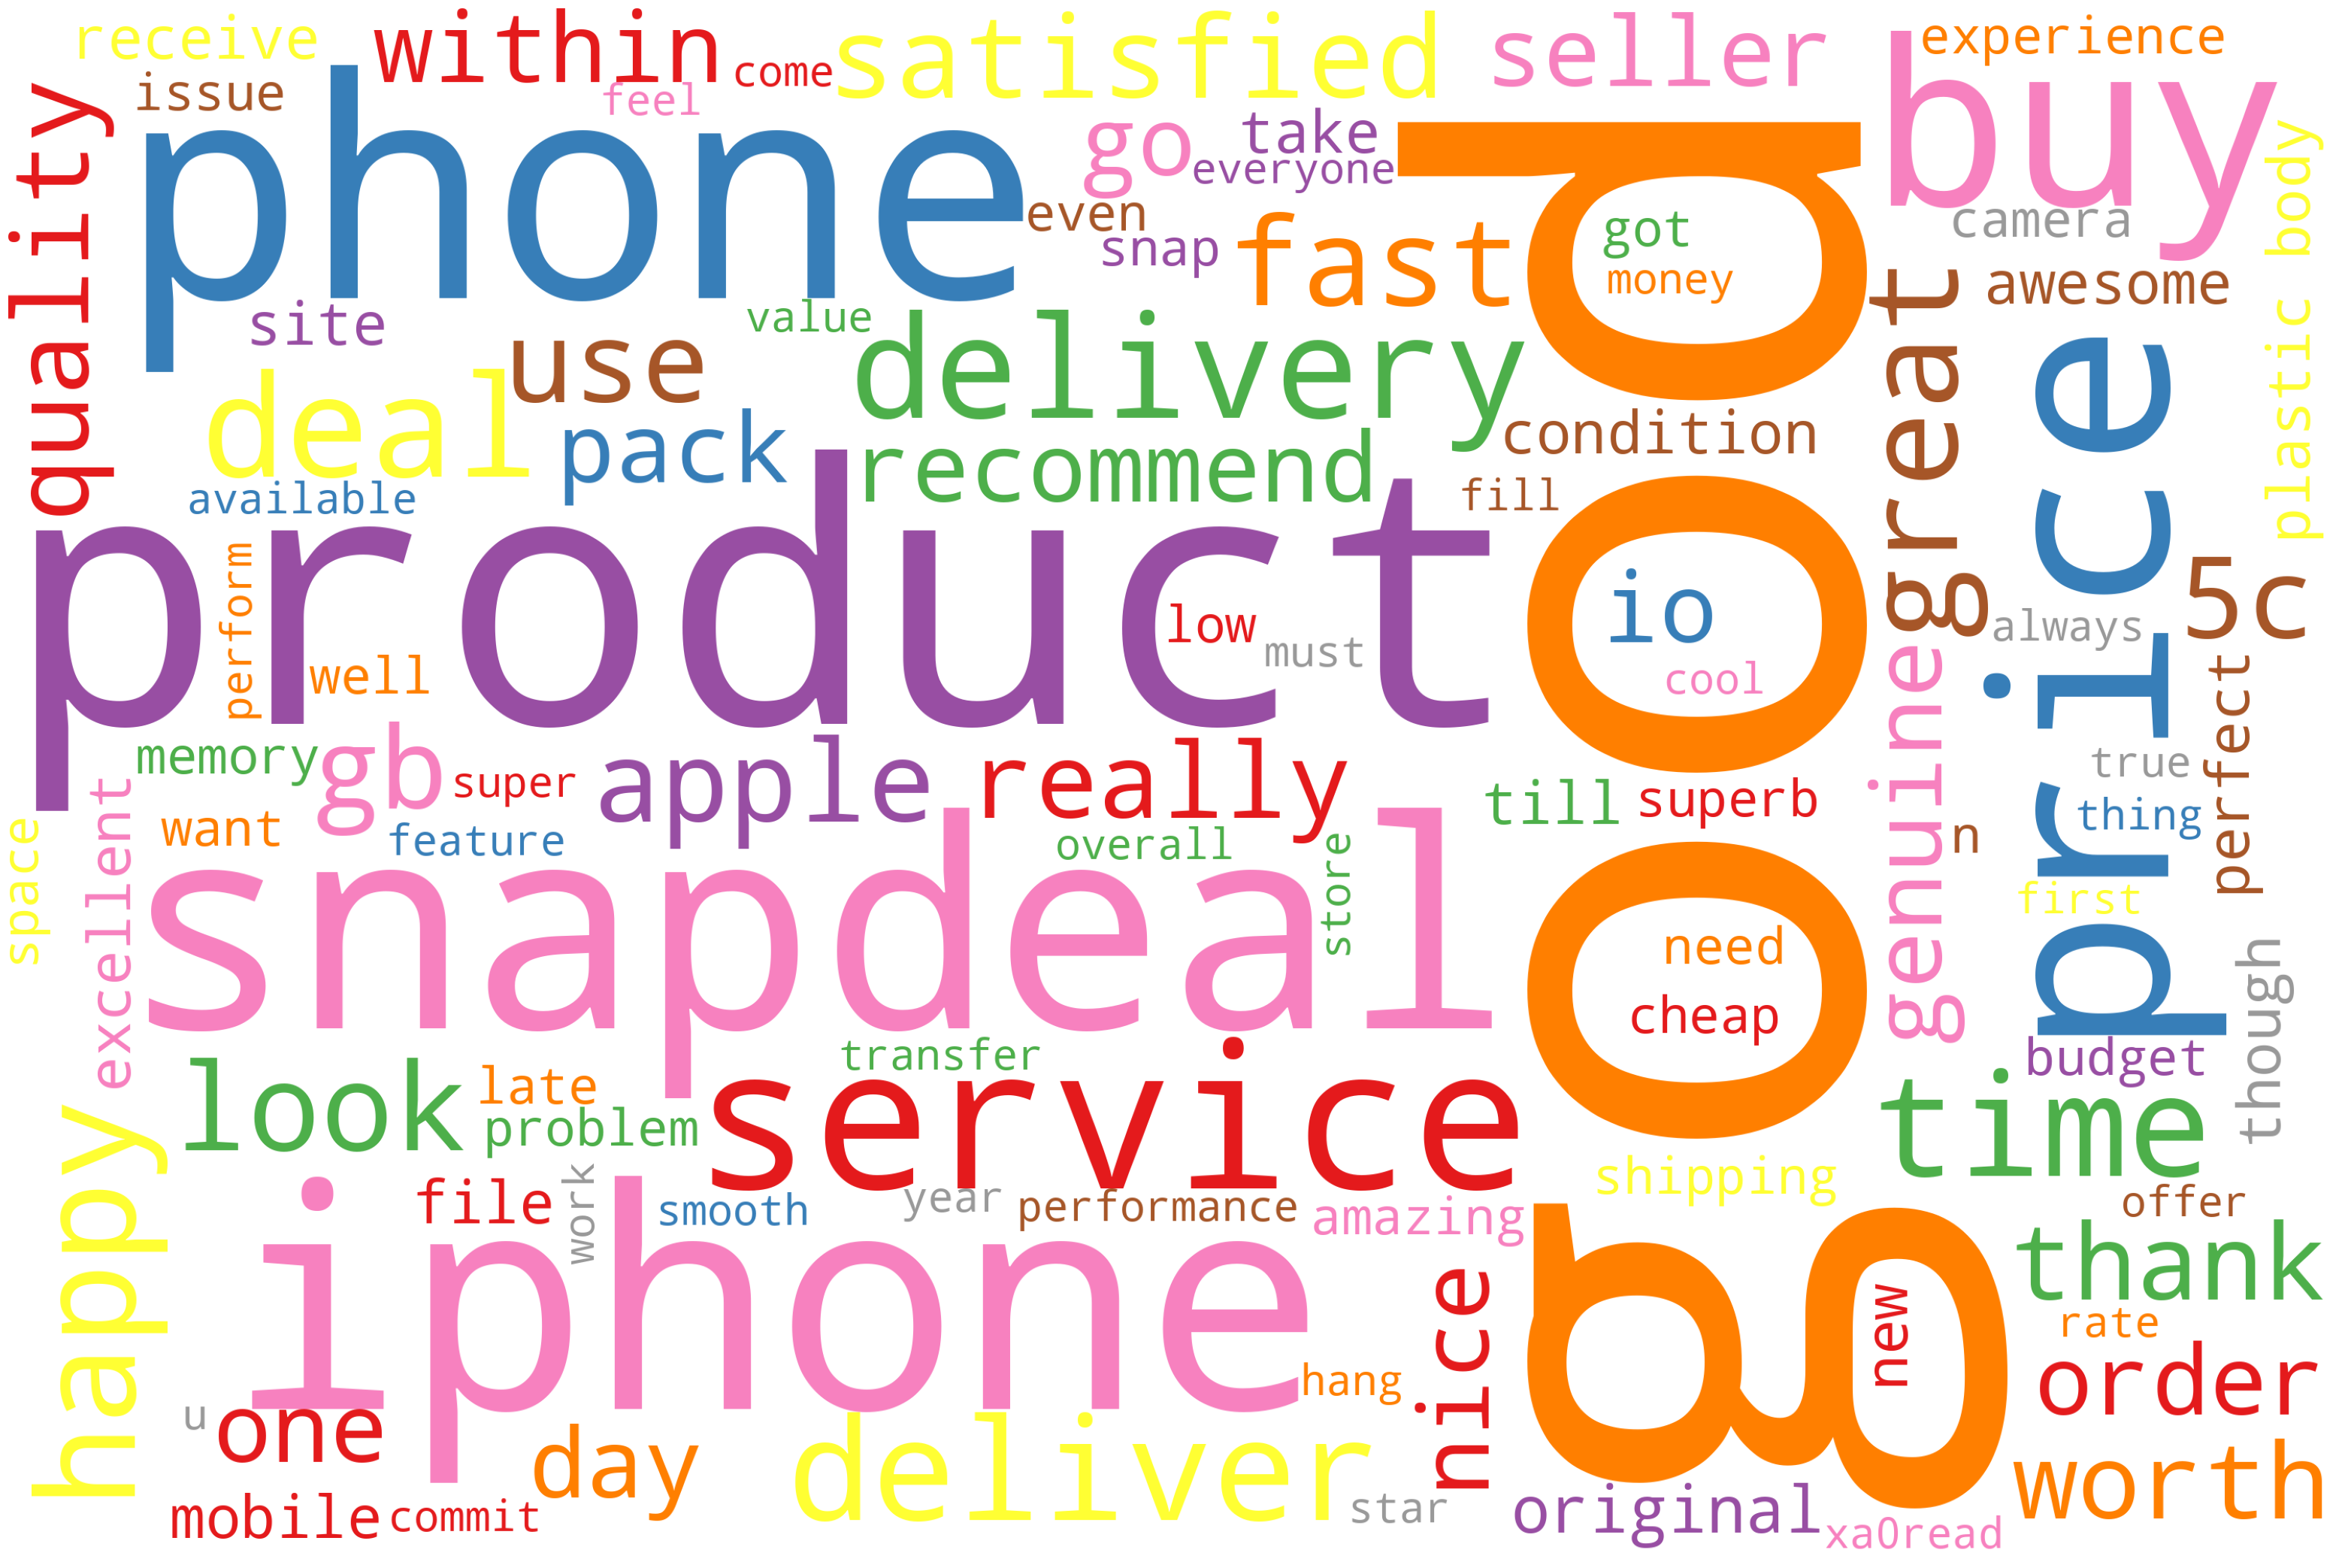

In [73]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', max_words=100,colormap='Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

name entity recognition

In [74]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [75]:
for token in doc_block[100:200]:
    print(token,token.pos_)

body NOUN
look VERB
attractive ADJ
premium NOUN
good ADJ
plastuc NOUN
use VERB
everyone PRON
go VERB
phone NOUN
budget NOUN
20k NOUN
excellent ADJ
product NOUN
good ADJ
service NOUN
snap NOUN
deal NOUN
dream NOUN
come VERB
true ADJ
good ADJ
phone NOUN
mobile NOUN
oparating NOUN
essy PROPN
inter PROPN
net ADJ
fast ADJ
work NOUN
nice ADJ
deal NOUN
snapdeal ADJ
good ADJ
shipping NOUN
service NOUN
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
really ADV
happy ADJ
product NOUN
servicealway NOUN
good ADJ
worth ADJ
buy VERB
snap ADJ
deal NOUN
due ADJ
competitive ADJ
price NOUN
good ADJ
servicenthank NOUN
sd NOUN
phone NOUN
price NOUN
pro ADJ
picture NOUN
quality NOUN
awesome ADJ
sound NOUN
hear VERB
ad NOUN
good ADJ
look NOUN
feel VERB
good ADJ
n NOUN
ncon NOUN
you PRON
transfer VERB
file NOUN
use VERB
bluetooth PRON
andriodblackberrywindow NOUN
iphone NOUN
you PRON
use VERB
file NOUN
transfer NOUN
app NOUN
like ADP
shareitnnother NOU

In [76]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['use', 'file', 'transfer', 'app', 'shareitnnother', 'iphone', 'itnniphone', 'time', 'delivery', 'star', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'awesum', 'phonegood', 'price', 'productiphone', 'phone', 'processing', 'memory', 'space', 'total', 'gb', 'space', 'gb', 'fill', 'need', 'buy', 'year', 'snapdeal', 'perfect', 'lagging', 'business', 'need', 'product', 'priceat', 'buy', 'apple', 'product', 'deal', 'make', 'n', 'order', 'finger', 'get', 'ths', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'earn', 'trust', 'mobile', 'hang', 'touch', 'perform', 'product', 'thank', 'product', 'quality', 'get', 'iphone', 'colour', 'condition', 'rate', 'nsnapdeal', 'rate', 'site', 'store', 'iphone', 'product', 'price', 'day', 'get', 'product', 'site', 'working', 'day', 'speaking', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience']


In [77]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,deliver,11
8,time,11
9,deal,11


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

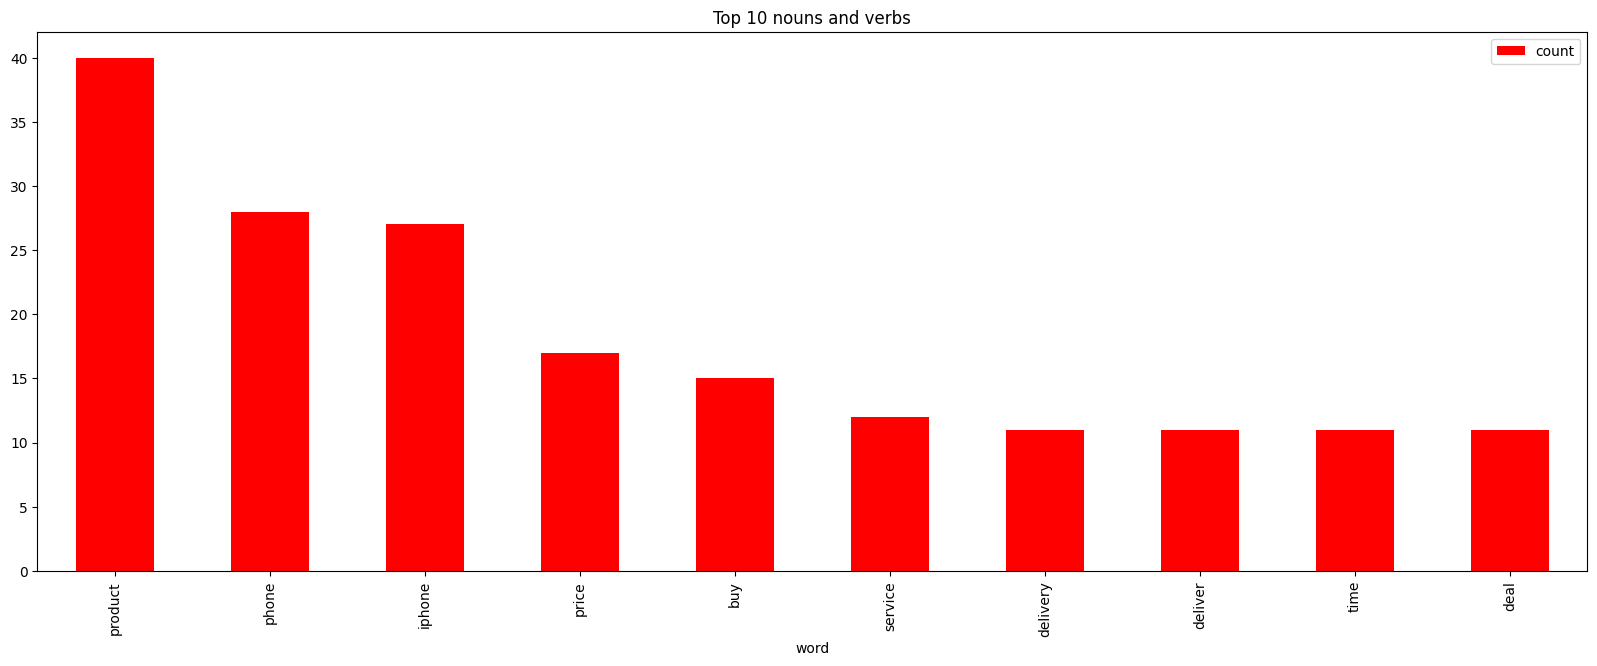

In [79]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red')

EMOTION MINING ANALYSIS

In [80]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Worth in this price.',
 'Excellent features.',
 'Overall performance is Good Good , product is satisfied which I got from Snapdeal Great product at such amazing price.',
 'Delivery was fast.',
 'N iPhone is amazing.',
 'Good budgeted iphone.',
 'Should only go for it if want to have an iphone experience but within your budget.',
 'offer product is available, customer care also good lovely  fastest super Very good product and delivered in time  as committed; true value for money This a great experience to have a iphone, Snapdeal delivery was above expectation !',
 '!',
 'Good price, Great phone, very happy to own one.',
 'Recommending to everyone Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price.',
 'It was packed beatifully by the seller and same day dispatch.',
 'Pros\n1.',
 'Very Cheap prize\n2.',
 'IOS 9 upgrade.',
 '3.',
 'Very smooth\n4.',
 'Good build quality\n\nCons\n1.Plastic body\n

In [81]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Worth in this price.
1,Excellent features.
2,"Overall performance is Good Good , product is ..."
3,Delivery was fast.
4,N iPhone is amazing.
...,...
123,The piece delivered in good conditions...
124,Received a discount of 1000rs on free charge c...
125,Delivered within 2 days before committed deliv...
126,I am really happy with product Awesome iphone ...


In [82]:
# Emotion Lexicon - Affin
affin=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [83]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [84]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [86]:
# manual testing
calculate_sentiment(text='great')

3

In [87]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      2
1      3
2      9
3      0
4      4
      ..
123    3
124    1
125    1
126    3
127    3
Name: sentiment_value, Length: 128, dtype: int64

In [88]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       4
1       2
2      20
3       3
4       4
       ..
123     6
124     9
125     7
126    12
127    13
Name: word_count, Length: 128, dtype: int64

In [89]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
38,But those all reviews are fake and just to dam...,-6,14
97,Dont buy on fraudulent schemes.,-4,5
108,Dere is only one problem nd dat is space... Bt...,-4,20
32,no lagging till today\nsuitable for your busin...,-3,9
58,Only problem is you need to pay for everything.,-3,9
...,...,...,...
33,Amazing product at this price....At first I wa...,15,72
35,Overall perfect I got my iPhone 5c white colou...,15,33
52,Awesome mobile working smooth just like an app...,17,40
7,"offer product is available, customer care also...",18,38


In [90]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    128.000000
mean       2.835938
std        4.610459
min       -6.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       29.000000
Name: sentiment_value, dtype: float64

In [91]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
3,Delivery was fast.,0,3
8,!,0,1
11,It was packed beatifully by the seller and sam...,0,11
12,Pros\n1.,0,2
13,Very Cheap prize\n2.,0,4
14,IOS 9 upgrade.,0,3
15,3.,0,1
16,Very smooth\n4.,0,3
19,Everyone should go with this phone if you have...,0,21
23,Genuine Product.,0,2


In [92]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Worth in this price.,2,4
1,Excellent features.,3,2
2,"Overall performance is Good Good , product is ...",9,20
4,N iPhone is amazing.,4,4
5,Good budgeted iphone.,3,3
...,...,...,...
123,The piece delivered in good conditions...,3,6
124,Received a discount of 1000rs on free charge c...,1,9
125,Delivered within 2 days before committed deliv...,1,7
126,I am really happy with product Awesome iphone ...,3,12


In [93]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Worth in this price.,2,4,0
1,Excellent features.,3,2,1
2,"Overall performance is Good Good , product is ...",9,20,2
3,Delivery was fast.,0,3,3
4,N iPhone is amazing.,4,4,4
...,...,...,...,...
123,The piece delivered in good conditions...,3,6,123
124,Received a discount of 1000rs on free charge c...,1,9,124
125,Delivered within 2 days before committed deliv...,1,7,125
126,I am really happy with product Awesome iphone ...,3,12,126


<ipython-input-94-21393d645e71>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

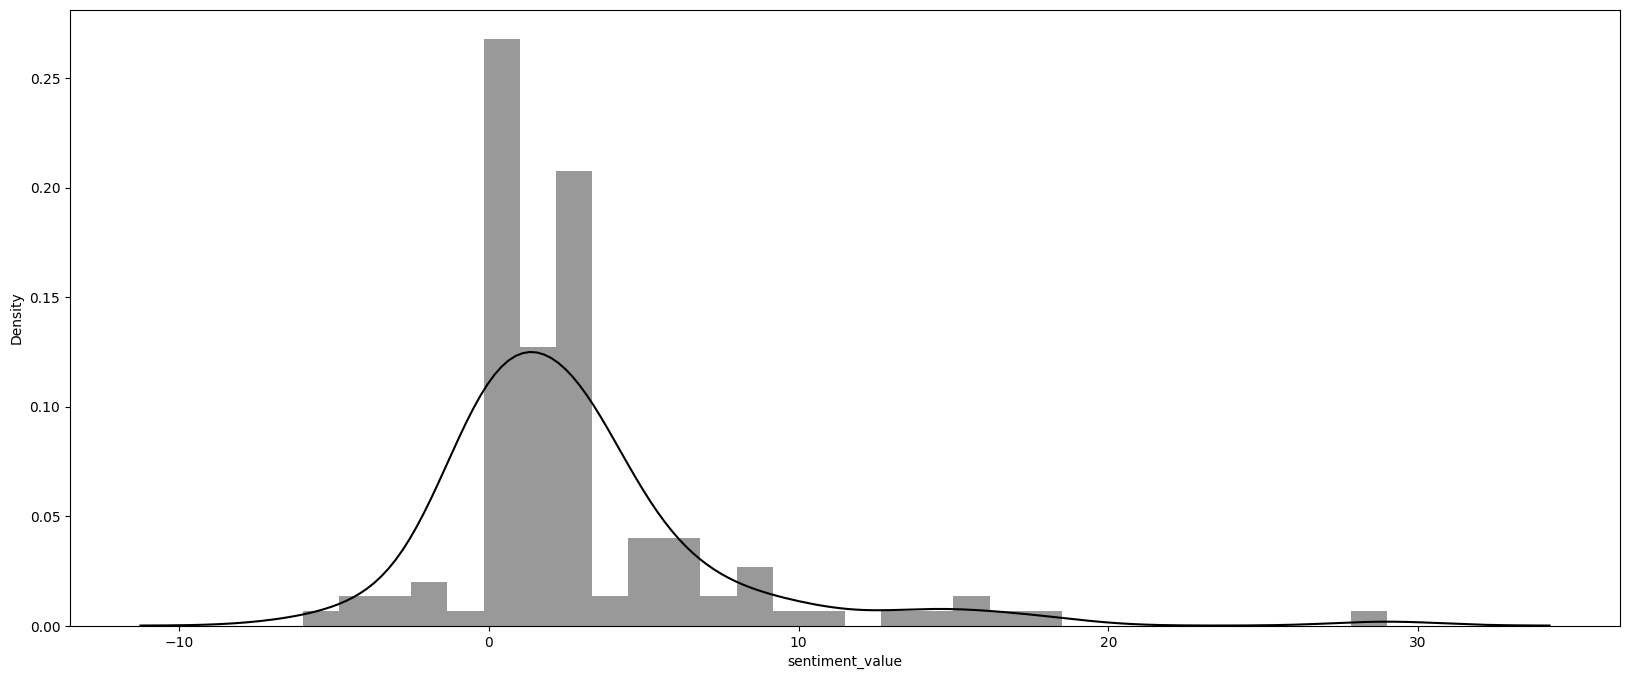

In [94]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<Axes: xlabel='index', ylabel='sentiment_value'>

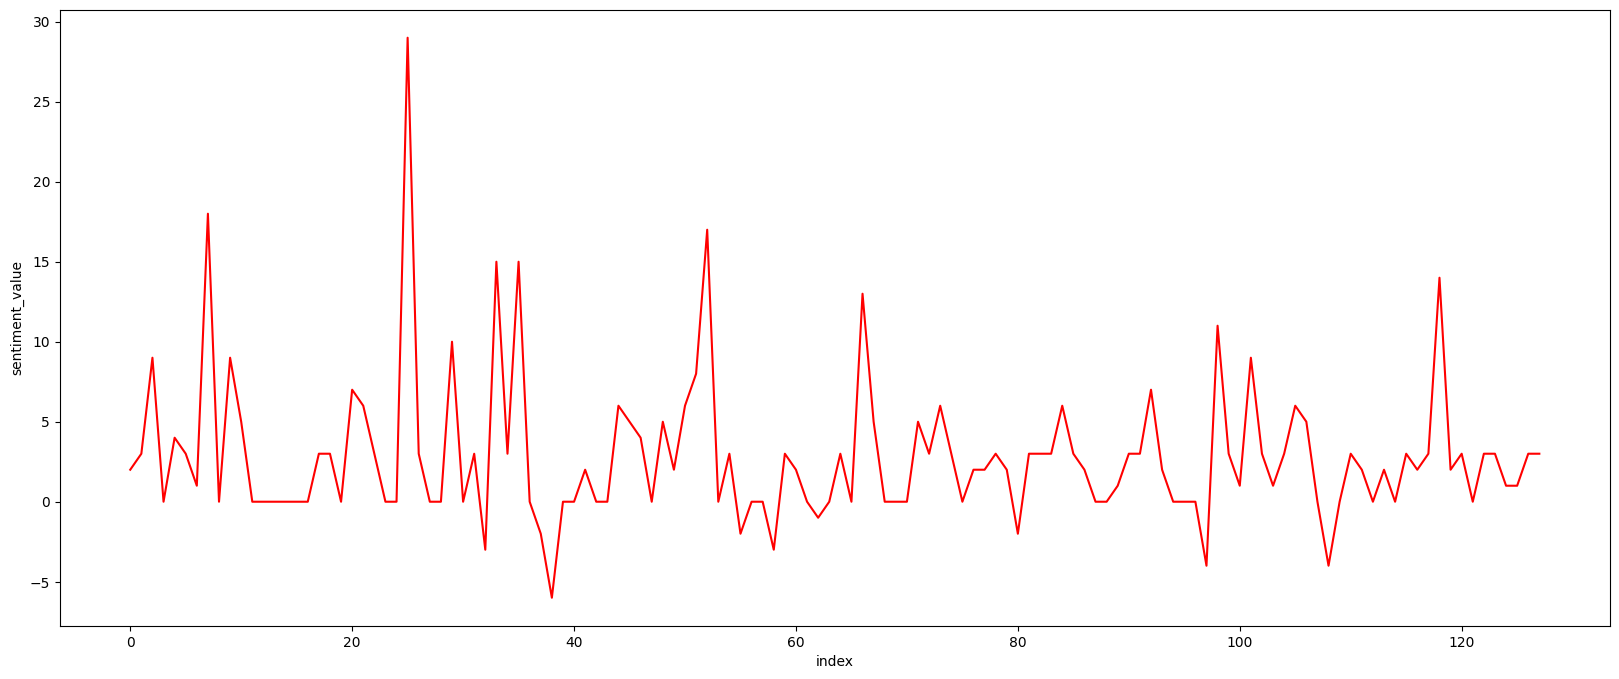

In [95]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(20,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df,color='red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

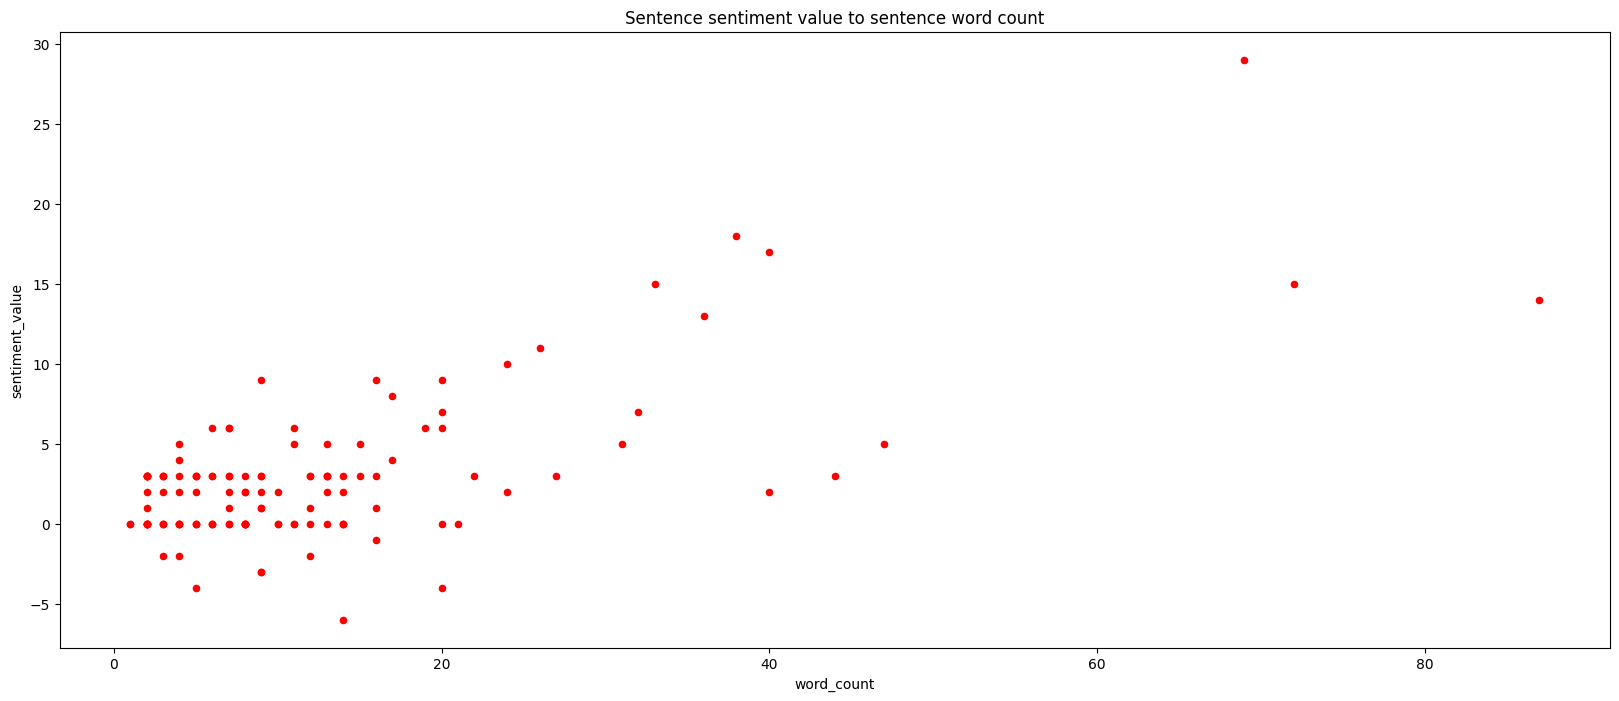

In [96]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(20,8),title='Sentence sentiment value to sentence word count',color='red')
